# Project - Uber Fare Predict

In [104]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [105]:
df = pd.read_csv("uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


# Data Cleaning

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [107]:
df[df.duplicated].sum()
# No Duplicates Present

Unnamed: 0             0
key                    0
fare_amount          0.0
pickup_datetime        0
pickup_longitude     0.0
pickup_latitude      0.0
dropoff_longitude    0.0
dropoff_latitude     0.0
passenger_count        0
dtype: object

In [108]:
# Checking for the Null Values
df.isnull().sum() , df.shape

(Unnamed: 0           0
 key                  0
 fare_amount          0
 pickup_datetime      0
 pickup_longitude     0
 pickup_latitude      0
 dropoff_longitude    1
 dropoff_latitude     1
 passenger_count      0
 dtype: int64,
 (200000, 9))

In [109]:
# Looking for the null value
df[df.isnull().any(axis = 1)]

# So as there is only one record containing the null values among 20000 records so we can just drop that record to make it more clean

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,32736015,2013-07-02 03:51:57.0000001,24.1,2013-07-02 03:51:57 UTC,-73.950581,40.779692,NaN,NaN,0


In [110]:
# Dropping the Record with the Nan Value
df = df.drop(87946).reset_index(drop = True)

In [111]:
# Checking for the null values
df.isnull().sum() , df.shape

(Unnamed: 0           0
 key                  0
 fare_amount          0
 pickup_datetime      0
 pickup_longitude     0
 pickup_latitude      0
 dropoff_longitude    0
 dropoff_latitude     0
 passenger_count      0
 dtype: int64,
 (199999, 9))

In [112]:
# Checking the Description
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [114]:
# Replacing the name of the Column 
df.columns = df.columns.str.replace('Unnamed: 0','Key')
df

,Key,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199994,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199995,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199996,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199997,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [115]:
# Droping the Fake key column because it is just the duplicate of the pickup datetime
df.drop(['key'],axis = 1 ,inplace=True)
df

,Key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
199994,42598914,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199995,16382965,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199996,27804658,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199997,20259894,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [116]:
# Getting the Clean Df for the EDA purpose
df_eda = df

# Feature Engineering

In [117]:
df.info()
# As the pickup_datetime is in the object format we need it to change in integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Key                199999 non-null  int64  
 1   fare_amount        199999 non-null  float64
 2   pickup_datetime    199999 non-null  object 
 3   pickup_longitude   199999 non-null  float64
 4   pickup_latitude    199999 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 12.2+ MB


In [118]:
df

,Key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
199994,42598914,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199995,16382965,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199996,27804658,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199997,20259894,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [119]:
df['date'] = df['pickup_datetime'].str.split(' ').str[0]
df['time'] = df['pickup_datetime'].str.split(' ').str[1]

In [120]:
df

,Key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00
...,...,...,...,...,...,...,...,...,...,...
199994,42598914,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28,10:49:00
199995,16382965,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14,01:09:00
199996,27804658,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,2009-06-29,00:42:00
199997,20259894,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,2015-05-20,14:56:25


In [121]:
df.drop(['pickup_datetime'], axis = 1 ,inplace = True)
df

,Key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00
...,...,...,...,...,...,...,...,...,...
199994,42598914,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28,10:49:00
199995,16382965,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14,01:09:00
199996,27804658,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009-06-29,00:42:00
199997,20259894,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015-05-20,14:56:25


In [122]:
from datetime import datetime
Day = []

for i in range(len(df)):
    y = df.loc[i]['date'].split('-')[0]
    m = df.loc[i]['date'].split('-')[1]
    d = df.loc[i]['date'].split('-')[2]
    
    Dt = datetime(int(y),int(m),int(d))
    Day.append(Dt.weekday())
    
len(Day)

199999

In [123]:
df['day'] = pd.DataFrame(Day)
df

,Key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time,day
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06,3
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56,4
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00,0
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21,4
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00,3
...,...,...,...,...,...,...,...,...,...,...
199994,42598914,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28,10:49:00,6
199995,16382965,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14,01:09:00,4
199996,27804658,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009-06-29,00:42:00,0
199997,20259894,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015-05-20,14:56:25,2


In [124]:
# ḍay converion in 0 for the weekday and 1 for the weekend
 

df['weekday'] = np.where(df['day'] <= 4 ,0,1)
df

,Key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time,day,weekday
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06,3,0
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56,4,0
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00,0,0
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21,4,0
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00,3,0
...,...,...,...,...,...,...,...,...,...,...,...
199994,42598914,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28,10:49:00,6,1
199995,16382965,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14,01:09:00,4,0
199996,27804658,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009-06-29,00:42:00,0,0
199997,20259894,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015-05-20,14:56:25,2,0


In [125]:
# df.drop('day',axis = 1 ,inplace = True)

In [126]:
df

,Key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time,day,weekday
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06,3,0
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56,4,0
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00,0,0
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21,4,0
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00,3,0
...,...,...,...,...,...,...,...,...,...,...,...
199994,42598914,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28,10:49:00,6,1
199995,16382965,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14,01:09:00,4,0
199996,27804658,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009-06-29,00:42:00,0,0
199997,20259894,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015-05-20,14:56:25,2,0


In [127]:
df['Date'] = df['date'].str.split('-').str[2]
df['Month'] = df['date'].str.split('-').str[1]
df['Year'] = df['date'].str.split('-').str[0]
df

,Key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time,day,weekday,Date,Month,Year
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06,3,0,07,05,2015
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56,4,0,17,07,2009
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00,0,0,24,08,2009
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21,4,0,26,06,2009
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00,3,0,28,08,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,42598914,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28,10:49:00,6,1,28,10,2012
199995,16382965,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14,01:09:00,4,0,14,03,2014
199996,27804658,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009-06-29,00:42:00,0,0,29,06,2009
199997,20259894,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015-05-20,14:56:25,2,0,20,05,2015


In [128]:
df.drop(['date'],axis = 1 , inplace = True)
df

,Key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time,day,weekday,Date,Month,Year
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19:52:06,3,0,07,05,2015
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20:04:56,4,0,17,07,2009
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21:45:00,0,0,24,08,2009
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,08:22:21,4,0,26,06,2009
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17:47:00,3,0,28,08,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,42598914,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10:49:00,6,1,28,10,2012
199995,16382965,7.5,-73.984722,40.736837,-74.006672,40.739620,1,01:09:00,4,0,14,03,2014
199996,27804658,30.9,-73.986017,40.756487,-73.858957,40.692588,2,00:42:00,0,0,29,06,2009
199997,20259894,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14:56:25,2,0,20,05,2015


In [129]:
df['Hours'] = df['time'].str.split(':').str[0]
df['Minute'] = df['time'].str.split(':').str[1]
df['Seconds'] = df['time'].str.split(':').str[2]
df

,Key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time,day,weekday,Date,Month,Year,Hours,Minute,Seconds
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19:52:06,3,0,07,05,2015,19,52,06
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20:04:56,4,0,17,07,2009,20,04,56
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21:45:00,0,0,24,08,2009,21,45,00
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,08:22:21,4,0,26,06,2009,08,22,21
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17:47:00,3,0,28,08,2014,17,47,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,42598914,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10:49:00,6,1,28,10,2012,10,49,00
199995,16382965,7.5,-73.984722,40.736837,-74.006672,40.739620,1,01:09:00,4,0,14,03,2014,01,09,00
199996,27804658,30.9,-73.986017,40.756487,-73.858957,40.692588,2,00:42:00,0,0,29,06,2009,00,42,00
199997,20259894,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14:56:25,2,0,20,05,2015,14,56,25


In [130]:
df.drop(['time'],inplace = True , axis = 1)
df

,Key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,weekday,Date,Month,Year,Hours,Minute,Seconds
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,3,0,07,05,2015,19,52,06
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,4,0,17,07,2009,20,04,56
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,0,24,08,2009,21,45,00
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,4,0,26,06,2009,08,22,21
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,3,0,28,08,2014,17,47,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,42598914,3.0,-73.987042,40.739367,-73.986525,40.740297,1,6,1,28,10,2012,10,49,00
199995,16382965,7.5,-73.984722,40.736837,-74.006672,40.739620,1,4,0,14,03,2014,01,09,00
199996,27804658,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,0,29,06,2009,00,42,00
199997,20259894,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2,0,20,05,2015,14,56,25


In [131]:
df

,Key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,weekday,Date,Month,Year,Hours,Minute,Seconds
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,3,0,07,05,2015,19,52,06
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,4,0,17,07,2009,20,04,56
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,0,24,08,2009,21,45,00
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,4,0,26,06,2009,08,22,21
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,3,0,28,08,2014,17,47,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,42598914,3.0,-73.987042,40.739367,-73.986525,40.740297,1,6,1,28,10,2012,10,49,00
199995,16382965,7.5,-73.984722,40.736837,-74.006672,40.739620,1,4,0,14,03,2014,01,09,00
199996,27804658,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,0,29,06,2009,00,42,00
199997,20259894,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2,0,20,05,2015,14,56,25


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Key                199999 non-null  int64  
 1   fare_amount        199999 non-null  float64
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
 7   day                199999 non-null  int64  
 8   weekday            199999 non-null  int64  
 9   Date               199999 non-null  object 
 10  Month              199999 non-null  object 
 11  Year               199999 non-null  object 
 12  Hours              199999 non-null  object 
 13  Minute             199999 non-null  object 
 14  Seconds            199999 non-null  object 
dtypes: float64(5), int64(4), object(6)
memory usage: 22

In [133]:
object = [features for features in df.columns if df[features].dtypes == 'O']
object

['Date', 'Month', 'Year', 'Hours', 'Minute', 'Seconds']

In [134]:
for i in object:
    df[i] = df[i].astype(int)

In [135]:
df['rush_hour'] = np.where(df['Hours'].between(7,10) | df['Hours'].between(17,20),1,0)

In [136]:
df['rush_hour'].value_counts()

rush_hour
0    119220
1     80779
Name: count, dtype: int64

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Key                199999 non-null  int64  
 1   fare_amount        199999 non-null  float64
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
 7   day                199999 non-null  int64  
 8   weekday            199999 non-null  int64  
 9   Date               199999 non-null  int64  
 10  Month              199999 non-null  int64  
 11  Year               199999 non-null  int64  
 12  Hours              199999 non-null  int64  
 13  Minute             199999 non-null  int64  
 14  Seconds            199999 non-null  int64  
 15  rush_hour          199999 non-null  int64  
dtypes:

In [138]:
df.head()

,Key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,weekday,Date,Month,Year,Hours,Minute,Seconds,rush_hour
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,3,0,7,5,2015,19,52,6,1
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,4,0,17,7,2009,20,4,56,1
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,0,24,8,2009,21,45,0,0
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,4,0,26,6,2009,8,22,21,1
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,3,0,28,8,2014,17,47,0,1


In [139]:
# Dropping the key Column because it is not going to be useful for prediction
df.drop(['Key'],axis = 1 , inplace=True)
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,weekday,Date,Month,Year,Hours,Minute,Seconds,rush_hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,3,0,7,5,2015,19,52,6,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,4,0,17,7,2009,20,4,56,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,0,24,8,2009,21,45,0,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,4,0,26,6,2009,8,22,21,1
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,3,0,28,8,2014,17,47,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,3.0,-73.987042,40.739367,-73.986525,40.740297,1,6,1,28,10,2012,10,49,0,1
199995,7.5,-73.984722,40.736837,-74.006672,40.739620,1,4,0,14,3,2014,1,9,0,0
199996,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,0,29,6,2009,0,42,0,0
199997,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2,0,20,5,2015,14,56,25,0


In [140]:
# %pip install geopy
# %pip show geopy

In [141]:
df[['dropoff_latitude','dropoff_longitude','pickup_latitude','pickup_longitude']].value_counts()

dropoff_latitude  dropoff_longitude  pickup_latitude  pickup_longitude
 0.000000          0.000000           0.000000         0.000000           3587
 41.366138        -73.137393          41.366138       -73.137393            57
 40.190564        -74.689831          40.190564       -74.689831             7
 40.803238        -73.940717          40.803238       -73.940717             7
 40.769413        -73.863300          40.769413       -73.863300             6
                                                                          ... 
-73.999127         40.737447         -73.996505        40.725567             1
-73.998797         40.723537         -73.993873        40.728495             1
-73.996070         40.738745         -74.007197        40.705075             1
-73.995975         40.725872         -73.988140        40.745852             1
-74.015750         40.715187         -73.954587        40.771512             1
Name: count, Length: 196278, dtype: int64

# Observation
- Found that many of the coordinates were out of the range because the latitude around the Newyork Lies between (40,42) and longitude lies between(-75,75)
- And Many of the Record were having the Zero as the coordinate which can't be possible so we should remove them

In [142]:
df[df['pickup_longitude']<=-90]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,weekday,Date,Month,Year,Hours,Minute,Seconds,rush_hour
4949,4.9,-748.016667,40.739957,-74.003570,40.734192,1,5,1,28,4,2012,0,58,0,0
40908,8.1,-93.824668,43.486656,-54.294363,35.174169,1,3,0,30,7,2009,19,51,48,1
48506,33.7,-735.200000,40.770092,-73.980187,40.765530,1,5,1,5,11,2011,23,26,0,0
75851,15.7,-1340.648410,1644.421482,-3356.666300,872.697628,1,5,1,5,11,2011,0,22,0,0
103744,12.9,-736.216667,40.767035,-73.982377,40.725562,1,4,0,14,10,2011,19,4,0,1
144252,7.3,-768.550000,40.757812,-73.997040,40.740007,1,2,0,26,8,2009,11,55,0,0
161651,4.1,-735.433332,40.740605,-74.006373,40.739607,1,2,0,12,5,2010,12,19,0,0
199935,4.1,-736.400000,40.774307,-73.982215,40.769672,5,5,1,21,7,2012,16,19,0,0


In [143]:
df[df['dropoff_latitude']<= -90]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,weekday,Date,Month,Year,Hours,Minute,Seconds,rush_hour
91421,16.1,57.418457,1292.016128,1153.572603,-881.985513,1,2,0,18,5,2011,13,24,0,0


In [144]:
df[df['dropoff_longitude'] <= -90]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,weekday,Date,Month,Year,Hours,Minute,Seconds,rush_hour
32549,15.7,-74.016055,40.715155,-737.916665,40.697862,2,5,1,16,6,2012,10,4,0,1
75851,15.7,-1340.648410,1644.421482,-3356.666300,872.697628,1,5,1,5,11,2011,0,22,0,0


In [145]:
df[df['dropoff_latitude']== 0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,weekday,Date,Month,Year,Hours,Minute,Seconds,rush_hour
7,2.5,0.0,0.0,0.0,0.0,1,1,0,11,12,2012,13,52,0,0
11,8.5,0.0,0.0,0.0,0.0,1,0,0,23,5,2011,22,15,0,0
65,6.0,0.0,0.0,0.0,0.0,1,0,0,5,5,2014,19,27,0,1
92,6.1,0.0,0.0,0.0,0.0,1,4,0,2,12,2011,14,7,0,0
120,6.5,0.0,0.0,0.0,0.0,1,4,0,20,8,2010,19,39,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199717,4.9,0.0,0.0,0.0,0.0,1,4,0,19,8,2011,7,16,0,1
199723,7.5,0.0,0.0,0.0,0.0,1,4,0,11,10,2013,11,25,41,0
199879,6.5,0.0,0.0,0.0,0.0,1,5,1,22,2,2014,6,45,46,0
199882,12.5,0.0,0.0,0.0,0.0,2,0,0,10,9,2012,17,39,0,1


In [146]:
# Removig the values which are out of the range
df = df[(df['pickup_latitude'].between(40.5,41.0)) & (df['dropoff_latitude'].between(40.5,41.0)) & (df['pickup_longitude'].between(-74.3, -73.7)) & (df['dropoff_longitude'].between(-74.3, -73.7))]
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,weekday,Date,Month,Year,Hours,Minute,Seconds,rush_hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,3,0,7,5,2015,19,52,6,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,4,0,17,7,2009,20,4,56,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,0,24,8,2009,21,45,0,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,4,0,26,6,2009,8,22,21,1
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,3,0,28,8,2014,17,47,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,3.0,-73.987042,40.739367,-73.986525,40.740297,1,6,1,28,10,2012,10,49,0,1
199995,7.5,-73.984722,40.736837,-74.006672,40.739620,1,4,0,14,3,2014,1,9,0,0
199996,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,0,29,6,2009,0,42,0,0
199997,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2,0,20,5,2015,14,56,25,0


In [147]:
# Removing the records which are having the Zero as coordinate
df = df[(df['pickup_latitude']!= 0) & (df['pickup_longitude']!= 0 ) & (df['dropoff_latitude']!= 0) & (df['dropoff_longitude']!= 0)]
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,weekday,Date,Month,Year,Hours,Minute,Seconds,rush_hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,3,0,7,5,2015,19,52,6,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,4,0,17,7,2009,20,4,56,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,0,24,8,2009,21,45,0,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,4,0,26,6,2009,8,22,21,1
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,3,0,28,8,2014,17,47,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,3.0,-73.987042,40.739367,-73.986525,40.740297,1,6,1,28,10,2012,10,49,0,1
199995,7.5,-73.984722,40.736837,-74.006672,40.739620,1,4,0,14,3,2014,1,9,0,0
199996,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,0,29,6,2009,0,42,0,0
199997,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2,0,20,5,2015,14,56,25,0


# Outlier in Fare Price

In [148]:
Q1 = df['fare_amount'].quantile(q = 0.25)
Q3 = df['fare_amount'].quantile(q = 0.75)
IQR = Q3 - Q1

Lower_fence = Q1 - (1.5 * IQR)
Upper_fence = Q3 + (1.5 * IQR)

Lower_fence , Upper_fence

(np.float64(-3.75), np.float64(22.25))

In [149]:
df = df[df['fare_amount'].between(Lower_fence,Upper_fence)]
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,weekday,Date,Month,Year,Hours,Minute,Seconds,rush_hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,3,0,7,5,2015,19,52,6,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,4,0,17,7,2009,20,4,56,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,0,24,8,2009,21,45,0,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,4,0,26,6,2009,8,22,21,1
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,3,0,28,8,2014,17,47,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199993,12.0,-73.983070,40.760770,-73.972972,40.754177,1,4,0,31,1,2014,14,42,0,0
199994,3.0,-73.987042,40.739367,-73.986525,40.740297,1,6,1,28,10,2012,10,49,0,1
199995,7.5,-73.984722,40.736837,-74.006672,40.739620,1,4,0,14,3,2014,1,9,0,0
199997,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2,0,20,5,2015,14,56,25,0


# Now there is Everything within the fence 

In [150]:
df[(df['fare_amount'] > Lower_fence) & (df['fare_amount'] < Upper_fence)]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,weekday,Date,Month,Year,Hours,Minute,Seconds,rush_hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,3,0,7,5,2015,19,52,6,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,4,0,17,7,2009,20,4,56,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,0,24,8,2009,21,45,0,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,4,0,26,6,2009,8,22,21,1
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,3,0,28,8,2014,17,47,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199993,12.0,-73.983070,40.760770,-73.972972,40.754177,1,4,0,31,1,2014,14,42,0,0
199994,3.0,-73.987042,40.739367,-73.986525,40.740297,1,6,1,28,10,2012,10,49,0,1
199995,7.5,-73.984722,40.736837,-74.006672,40.739620,1,4,0,14,3,2014,1,9,0,0
199997,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2,0,20,5,2015,14,56,25,0


# But there are still some of the negative fares which cannot happened

In [151]:
df = df[df['fare_amount'] > 0]

# Now there are no outliers in the fare amount and not any values <= 0 

In [152]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,weekday,Date,Month,Year,Hours,Minute,Seconds,rush_hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,3,0,7,5,2015,19,52,6,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,4,0,17,7,2009,20,4,56,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,0,24,8,2009,21,45,0,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,4,0,26,6,2009,8,22,21,1
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,3,0,28,8,2014,17,47,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199993,12.0,-73.983070,40.760770,-73.972972,40.754177,1,4,0,31,1,2014,14,42,0,0
199994,3.0,-73.987042,40.739367,-73.986525,40.740297,1,6,1,28,10,2012,10,49,0,1
199995,7.5,-73.984722,40.736837,-74.006672,40.739620,1,4,0,14,3,2014,1,9,0,0
199997,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2,0,20,5,2015,14,56,25,0


# Now there is an Outlier and Zero for the Passenger_count 

In [153]:
df['passenger_count'].unique()

array([  1,   3,   5,   2,   4,   6,   0, 208])

In [154]:
df[df['passenger_count']==208]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,weekday,Date,Month,Year,Hours,Minute,Seconds,rush_hour
113037,11.7,-73.937795,40.758498,-73.937835,40.758415,208,1,0,28,12,2010,8,20,0,1


In [155]:
df['passenger_count'].value_counts()

passenger_count
1      124114
2       26090
5       12547
3        7936
4        3792
6        3783
0         653
208         1
Name: count, dtype: int64

In [156]:
# Removing the outlier 208 and 0 passenger's record
df = df[df['passenger_count'].between(1,6)]
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,weekday,Date,Month,Year,Hours,Minute,Seconds,rush_hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,3,0,7,5,2015,19,52,6,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,4,0,17,7,2009,20,4,56,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,0,24,8,2009,21,45,0,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,4,0,26,6,2009,8,22,21,1
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,3,0,28,8,2014,17,47,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199993,12.0,-73.983070,40.760770,-73.972972,40.754177,1,4,0,31,1,2014,14,42,0,0
199994,3.0,-73.987042,40.739367,-73.986525,40.740297,1,6,1,28,10,2012,10,49,0,1
199995,7.5,-73.984722,40.736837,-74.006672,40.739620,1,4,0,14,3,2014,1,9,0,0
199997,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2,0,20,5,2015,14,56,25,0


In [157]:
# For checking that outliers are removed
df['passenger_count'].value_counts()

passenger_count
1    124114
2     26090
5     12547
3      7936
4      3792
6      3783
Name: count, dtype: int64

In [158]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
day                  0
weekday              0
Date                 0
Month                0
Year                 0
Hours                0
Minute               0
Seconds              0
rush_hour            0
dtype: int64

# Final Check 
- No null values in any fields.
- fare_amount is cleaned by removing the outlier , negative fare and 0's.
- passenger_cout is cleaned by removing the outlier and 0's.
- Latitude and Longitude of the pickup and dropoff are in proper range (40,42) and (-75,75).

# Distance Calculations

In [159]:
# from geopy.distance import geodesic

# def calculate_distance(row):
#     start = (row['pickup_latitude'], row['pickup_longitude'])
#     end = (row['dropoff_latitude'], row['dropoff_longitude'])
#     return geodesic(start, end).kilometers


# df['distance_km'] = df.apply(calculate_distance, axis=1)

In [160]:
def haversine_distance(lat1, lon1, lat2, lon2 , unit = 'miles'):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    R = 6371 
    return R * c

df['distance_km'] = haversine_distance(df['pickup_latitude'] , df['pickup_longitude'] , df['dropoff_latitude'] , df['dropoff_longitude'])


C:\Users\Admin\AppData\Local\Temp\ipykernel_24184\1351326607.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_km'] = haversine_distance(df['pickup_latitude'] , df['pickup_longitude'] , df['dropoff_latitude'] , df['dropoff_longitude'])


In [161]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,weekday,Date,Month,Year,Hours,Minute,Seconds,rush_hour,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,3,0,7,5,2015,19,52,6,1,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,4,0,17,7,2009,20,4,56,1,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,0,24,8,2009,21,45,0,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,4,0,26,6,2009,8,22,21,1,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,3,0,28,8,2014,17,47,0,1,4.475450


In [162]:
df['distance_km'].value_counts()

distance_km
0.000000    1782
0.000424       4
0.000778       2
4.475450       1
2.332711       1
            ... 
3.229439       1
1.429515       1
2.233696       1
1.895047       1
1.661683       1
Name: count, Length: 176477, dtype: int64

# After Calculating the distance we found that there are rides which have 0.0000 km of travel which is not valid , so we are removing that records

In [163]:
df = df[df['distance_km'] > 0]
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,weekday,Date,Month,Year,Hours,Minute,Seconds,rush_hour,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,3,0,7,5,2015,19,52,6,1,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,4,0,17,7,2009,20,4,56,1,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,0,24,8,2009,21,45,0,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,4,0,26,6,2009,8,22,21,1,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,3,0,28,8,2014,17,47,0,1,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199993,12.0,-73.983070,40.760770,-73.972972,40.754177,1,4,0,31,1,2014,14,42,0,0,1.122878
199994,3.0,-73.987042,40.739367,-73.986525,40.740297,1,6,1,28,10,2012,10,49,0,1,0.112210
199995,7.5,-73.984722,40.736837,-74.006672,40.739620,1,4,0,14,3,2014,1,9,0,0,1.875050
199997,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2,0,20,5,2015,14,56,25,0,3.539715


In [164]:
df['distance_km'].value_counts()

distance_km
0.000424    4
0.000778    2
5.036377    1
1.661683    1
4.475450    1
           ..
3.229439    1
1.429515    1
2.233696    1
1.895047    1
2.457590    1
Name: count, Length: 176476, dtype: int64

- Now we have cleaned dataset with a distance column , so now we can just drop the columns of latitude and longitude 

In [165]:
# For using further we are just making an copy of the cleaned dataset if we want to use
df_cleaned = df


In [166]:
df.drop(['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'] , axis=1 , inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_24184\3099967303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'] , axis=1 , inplace = True)


In [167]:
df

,fare_amount,passenger_count,day,weekday,Date,Month,Year,Hours,Minute,Seconds,rush_hour,distance_km
0,7.5,1,3,0,7,5,2015,19,52,6,1,1.683323
1,7.7,1,4,0,17,7,2009,20,4,56,1,2.457590
2,12.9,1,0,0,24,8,2009,21,45,0,0,5.036377
3,5.3,3,4,0,26,6,2009,8,22,21,1,1.661683
4,16.0,5,3,0,28,8,2014,17,47,0,1,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...
199993,12.0,1,4,0,31,1,2014,14,42,0,0,1.122878
199994,3.0,1,6,1,28,10,2012,10,49,0,1,0.112210
199995,7.5,1,4,0,14,3,2014,1,9,0,0,1.875050
199997,14.5,1,2,0,20,5,2015,14,56,25,0,3.539715


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176480 entries, 0 to 199998
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fare_amount      176480 non-null  float64
 1   passenger_count  176480 non-null  int64  
 2   day              176480 non-null  int64  
 3   weekday          176480 non-null  int64  
 4   Date             176480 non-null  int64  
 5   Month            176480 non-null  int64  
 6   Year             176480 non-null  int64  
 7   Hours            176480 non-null  int64  
 8   Minute           176480 non-null  int64  
 9   Seconds          176480 non-null  int64  
 10  rush_hour        176480 non-null  int64  
 11  distance_km      176480 non-null  float64
dtypes: float64(2), int64(10)
memory usage: 17.5 MB


In [169]:
df

,fare_amount,passenger_count,day,weekday,Date,Month,Year,Hours,Minute,Seconds,rush_hour,distance_km
0,7.5,1,3,0,7,5,2015,19,52,6,1,1.683323
1,7.7,1,4,0,17,7,2009,20,4,56,1,2.457590
2,12.9,1,0,0,24,8,2009,21,45,0,0,5.036377
3,5.3,3,4,0,26,6,2009,8,22,21,1,1.661683
4,16.0,5,3,0,28,8,2014,17,47,0,1,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...
199993,12.0,1,4,0,31,1,2014,14,42,0,0,1.122878
199994,3.0,1,6,1,28,10,2012,10,49,0,1,0.112210
199995,7.5,1,4,0,14,3,2014,1,9,0,0,1.875050
199997,14.5,1,2,0,20,5,2015,14,56,25,0,3.539715


- the seconds column is not usefull for the prediction so we will not use it

In [170]:
df.drop(['Seconds'],axis = 1,inplace=True)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_24184\120395563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Seconds'],axis = 1,inplace=True)


,fare_amount,passenger_count,day,weekday,Date,Month,Year,Hours,Minute,rush_hour,distance_km
0,7.5,1,3,0,7,5,2015,19,52,1,1.683323
1,7.7,1,4,0,17,7,2009,20,4,1,2.457590
2,12.9,1,0,0,24,8,2009,21,45,0,5.036377
3,5.3,3,4,0,26,6,2009,8,22,1,1.661683
4,16.0,5,3,0,28,8,2014,17,47,1,4.475450
...,...,...,...,...,...,...,...,...,...,...,...
199993,12.0,1,4,0,31,1,2014,14,42,0,1.122878
199994,3.0,1,6,1,28,10,2012,10,49,1,0.112210
199995,7.5,1,4,0,14,3,2014,1,9,0,1.875050
199997,14.5,1,2,0,20,5,2015,14,56,0,3.539715


In [171]:
df.corr()

,fare_amount,passenger_count,day,weekday,Date,Month,Year,Hours,Minute,rush_hour,distance_km
fare_amount,1.000000,0.012950,0.020441,0.007010,0.006526,0.026695,0.135817,-0.013043,-0.008067,-0.022929,0.804644
passenger_count,0.012950,1.000000,0.037522,0.043471,0.002577,0.008624,0.002647,0.015338,0.000081,-0.019218,0.001736
day,0.020441,0.037522,1.000000,0.780831,0.004526,-0.009574,0.005515,-0.088033,-0.003927,-0.108121,0.039149
weekday,0.007010,0.043471,0.780831,1.000000,0.003255,-0.006534,0.010508,-0.091186,-0.001811,-0.115430,0.045055
Date,0.006526,0.002577,0.004526,0.003255,1.000000,-0.016206,-0.010722,0.005550,-0.000470,0.000180,0.005712
Month,0.026695,0.008624,-0.009574,-0.006534,-0.016206,1.000000,-0.115165,-0.003137,-0.001886,-0.004338,0.005189
Year,0.135817,0.002647,0.005515,0.010508,-0.010722,-0.115165,1.000000,0.002904,-0.000926,-0.005279,-0.035086
Hours,-0.013043,0.015338,-0.088033,-0.091186,0.005550,-0.003137,0.002904,1.000000,0.000139,0.098645,-0.037495
Minute,-0.008067,0.000081,-0.003927,-0.001811,-0.000470,-0.001886,-0.000926,0.000139,1.000000,0.020924,-0.008284
rush_hour,-0.022929,-0.019218,-0.108121,-0.115430,0.000180,-0.004338,-0.005279,0.098645,0.020924,1.000000,-0.049637


<Axes: >

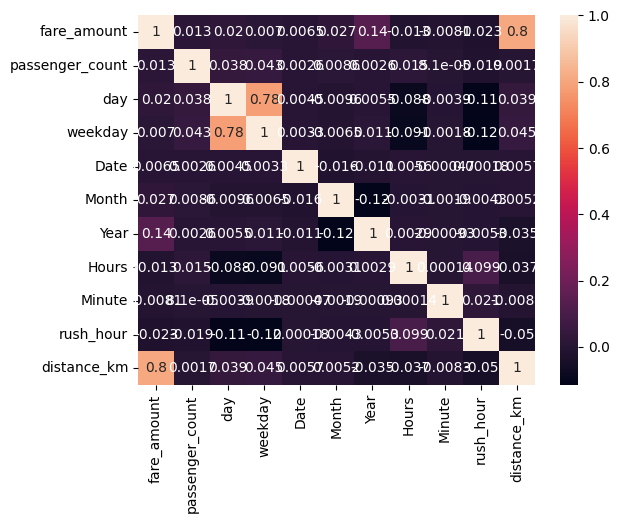

In [172]:
sns.heatmap(df.corr() , annot = True)

In [173]:
# sns.pairplot(df)

In [174]:
df.columns

Index(['fare_amount', 'passenger_count', 'day', 'weekday', 'Date', 'Month',
       'Year', 'Hours', 'Minute', 'rush_hour', 'distance_km'],
      dtype='object')

# Model Training

In [175]:
# Seperating input and output features
# X = df.iloc[:,1:]
# Y = df.iloc[:,0]
X = df[['Year','Month','day','rush_hour','passenger_count','distance_km']]
Y = df['fare_amount']

# Independent Feature

In [176]:
X

,Year,Month,day,rush_hour,passenger_count,distance_km
0,2015,5,3,1,1,1.683323
1,2009,7,4,1,1,2.457590
2,2009,8,0,0,1,5.036377
3,2009,6,4,1,3,1.661683
4,2014,8,3,1,5,4.475450
...,...,...,...,...,...,...
199993,2014,1,4,0,1,1.122878
199994,2012,10,6,1,1,0.112210
199995,2014,3,4,0,1,1.875050
199997,2015,5,2,0,1,3.539715


# Dependent Feature

In [177]:
Y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199993    12.0
199994     3.0
199995     7.5
199997    14.5
199998    14.1
Name: fare_amount, Length: 176480, dtype: float64

# Train Test Split

In [178]:
from sklearn.model_selection import train_test_split

X_train, X_test , Y_train , Y_test = train_test_split(X , Y , test_size= 0.20 , random_state=42)

# Standardizing

In [179]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train , X_test

(array([[-0.91807054,  0.50411976,  1.51584379, -0.8324759 , -0.52660843,
          1.12241021],
        [-1.45584856,  0.21375849,  1.51584379, -0.8324759 ,  0.24058469,
         -0.45522661],
        [-0.91807054, -0.94768658,  1.00128088,  1.20123598,  0.24058469,
          0.09753151],
        ...,
        [-1.45584856, -0.07660277,  0.48671797, -0.8324759 , -0.52660843,
          0.16100535],
        [ 0.1574855 ,  0.50411976,  1.00128088, -0.8324759 , -0.52660843,
          2.65902688],
        [ 1.77081955, -1.23804785,  1.51584379, -0.8324759 , -0.52660843,
          0.31727505]], shape=(141184, 6)),
 array([[-0.38029252,  0.21375849,  1.51584379, -0.8324759 , -0.52660843,
         -0.49650226],
        [ 0.69526351,  1.66556483,  1.51584379, -0.8324759 , -0.52660843,
          0.82846666],
        [-0.91807054, -1.23804785, -0.02784494,  1.20123598, -0.52660843,
         -0.28271954],
        ...,
        [-0.38029252, -0.36696404, -0.02784494, -0.8324759 , -0.52660843,
      

# Linear Regression

In [180]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Coeffecient and Intercept

In [181]:
reg.coef_ , reg.intercept_

(array([ 0.69976713,  0.16948559, -0.0403198 ,  0.06761584,  0.05188224,
         3.35733396]),
 np.float64(8.968873101767903))

# Predictions

In [182]:
Y_pred_test = reg.predict(X_test)
Y_pred_train = reg.predict(X_train)
Y_pred_test , Y_pred_train

(array([ 6.92733327, 12.37439543,  7.22244598, ..., 11.99113234,
         6.9211117 ,  8.14031733], shape=(35296,)),
 array([12.03545577,  6.35307436,  8.54659733, ...,  8.37444923,
        17.96777694, 10.91867276], shape=(141184,)))

# Performance Matrics On test data

In [183]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

mse = mean_squared_error(Y_test,Y_pred_test)
mae = mean_absolute_error(Y_test,Y_pred_test)
rmse = np.sqrt(mse)
score = r2_score(Y_test,Y_pred_test)
adj_score = 1 - ((1 - score) * len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)


print("The MSE is =",mse)
print("The MAE is =",mae)     
print("The RMSE is =",rmse)
print("The R2-Score is =",score)
print("The Adjusted R2-Score is =",adj_score)

The MSE is = 5.3991439202108085
The MAE is = 1.61091574228306
The RMSE is = 2.3236058013808645
The R2-Score is = 0.683478160731027
The Adjusted R2-Score is = 0.6834437122378738


In [202]:
import pickle

pickle.dump(reg , open('Uber_Model.pkl','wb'))


# Performance Matrics on training Data

In [184]:
mse_train = mean_squared_error(Y_train,Y_pred_train)
mae_train = mean_absolute_error(Y_train,Y_pred_train)
rmse_train = np.sqrt(mse_train)
score_train = r2_score(Y_train,Y_pred_train)
adj_score_train = 1 - ((1 - score_train) * len(Y_train) - 1) / (len(Y_train) - X_train.shape[1] - 1)


print("The MSE is =",mse_train)
print("The MAE is =",mae_train)

print("The RMSE is =",rmse_train)
print("The R2-Score is =",score_train)
print("The Adjusted R2-Score is =",adj_score_train)

The MSE is = 5.571738486725335
The MAE is = 1.621037713643469
The RMSE is = 2.3604530257400453
The R2-Score is = 0.6750011339408668
The Adjusted R2-Score is = 0.6749921027809582


# Lasso Cross Validation

In [185]:
from sklearn.linear_model import LassoCV

lassoreg = LassoCV(cv = 5)

lassoreg.fit(X_train,Y_train)
Y_pred_lasso_test = lassoreg.predict(X_test)

mse_lasso = mean_squared_error(Y_test,Y_pred_lasso_test)
score_lasso = r2_score(Y_test,Y_pred_lasso_test)

print("The MSE from Lasso CV is =",mse_lasso)
print("The Accuracy from Lasso CV is =",score_lasso)

The MSE from Lasso CV is = 5.399747599282137
The Accuracy from Lasso CV is = 0.6834427703778878


# Ridge Cross Validation

In [186]:
from sklearn.linear_model import RidgeCV

Rigreg = RidgeCV(cv = 5)

Rigreg.fit(X_train,Y_train)
Y_pred_Ridge_test = Rigreg.predict(X_test)

mse_ridge = mean_squared_error(Y_test,Y_pred_Ridge_test)
score_ridge = r2_score(Y_test,Y_pred_Ridge_test)

print("The MSE From Ridge CV is =",mse_ridge)
print("The Accuracy from Ridge CV is =",score_ridge)

The MSE From Ridge CV is = 5.399165172927863
The Accuracy from Ridge CV is = 0.6834769148021924


# Elastic Net Cross Validation

In [187]:
from sklearn.linear_model import ElasticNetCV

Elareg = ElasticNetCV(cv = 5)

Elareg.fit(X_train,Y_train)

Y_pred_ela_test = Elareg.predict(X_test)

mse_ela = mean_squared_error(Y_test,Y_pred_ela_test)
score_ela = r2_score(Y_test,Y_pred_ela_test)

print("The MSE from ElasticNet CV is =",mse_ela)
print("The Accuracy from ElasticNet CV is =",score_ela)

The MSE from ElasticNet CV is = 5.400975341750355
The Accuracy from ElasticNet CV is = 0.6833707946517482


Text(0.5, 1.0, 'Fare Amount Count')

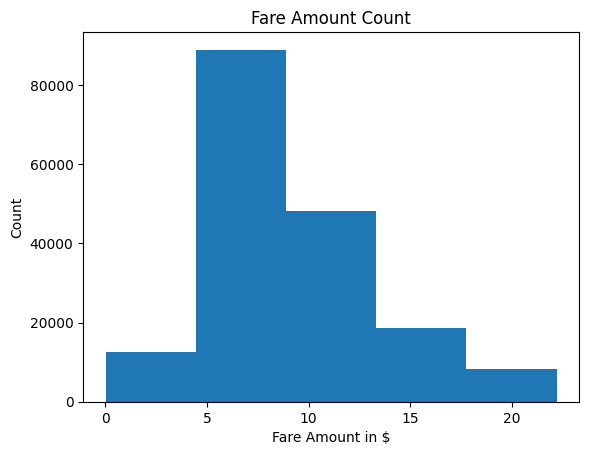

In [188]:
plt.Figure(figsize=(15,10))
plt.hist(df['fare_amount'],bins = 5)
plt.xlabel("Fare Amount in $")
plt.ylabel("Count")
plt.title("Fare Amount Count")

Text(0.5, 1.0, "Passenger's Count")

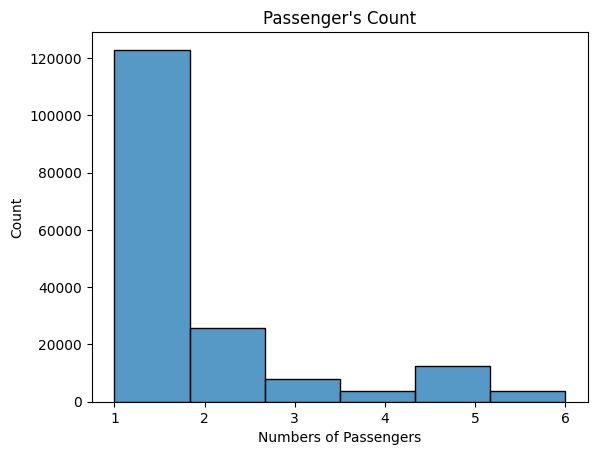

In [189]:
plt.Figure(figsize=(15,10))
sns.histplot(df['passenger_count'],bins = 6)
plt.xlabel("Numbers of Passengers")
plt.ylabel("Count")
plt.title("Passenger's Count")

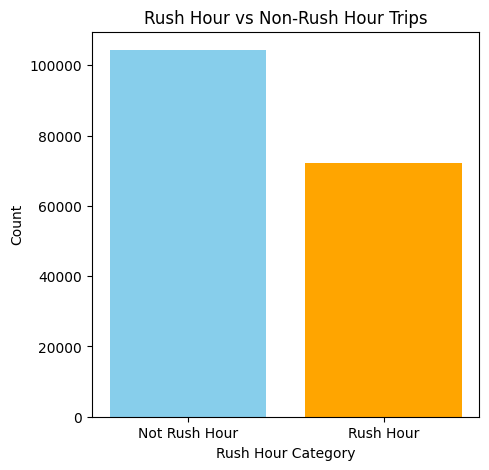

In [190]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

rush_counts = df['rush_hour'].value_counts().sort_index()

plt.bar(['Not Rush Hour', 'Rush Hour'], rush_counts, color=['skyblue', 'orange'])

plt.xlabel("Rush Hour Category")
plt.ylabel("Count")
plt.title("Rush Hour vs Non-Rush Hour Trips")

plt.show()


In [191]:
X

,Year,Month,day,rush_hour,passenger_count,distance_km
0,2015,5,3,1,1,1.683323
1,2009,7,4,1,1,2.457590
2,2009,8,0,0,1,5.036377
3,2009,6,4,1,3,1.661683
4,2014,8,3,1,5,4.475450
...,...,...,...,...,...,...
199993,2014,1,4,0,1,1.122878
199994,2012,10,6,1,1,0.112210
199995,2014,3,4,0,1,1.875050
199997,2015,5,2,0,1,3.539715


In [192]:
Y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199993    12.0
199994     3.0
199995     7.5
199997    14.5
199998    14.1
Name: fare_amount, Length: 176480, dtype: float64

# Prediction for the Random data

In [193]:
reg.predict(scaler.transform([[2009, 7,4 ,1 , 3 , 4.45]]))

c:\Users\Admin\Desktop\Data Science\venv_newpy\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([11.55213306])

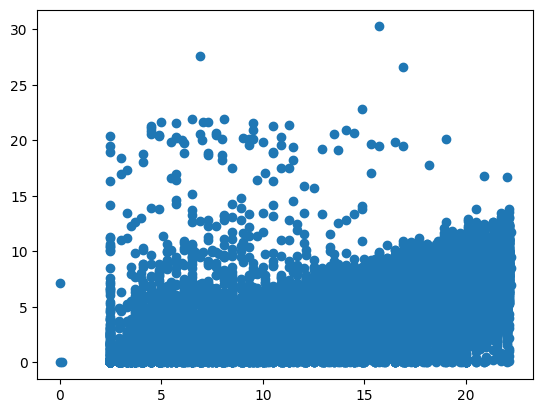

In [198]:
plt.scatter(x= 'fare_amount',y = 'distance_km' , data = df)

# Assumptions for the Model If it is Good or not

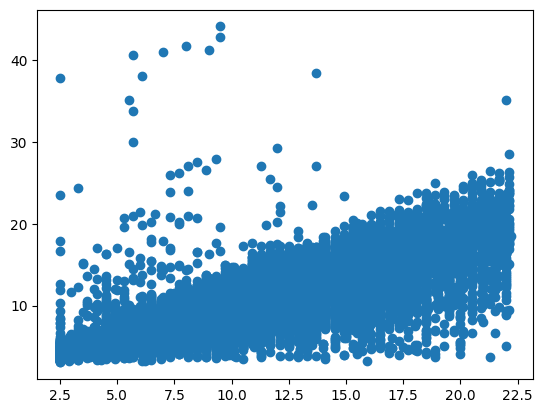

In [206]:
plt.scatter(Y_test , Y_pred_test)

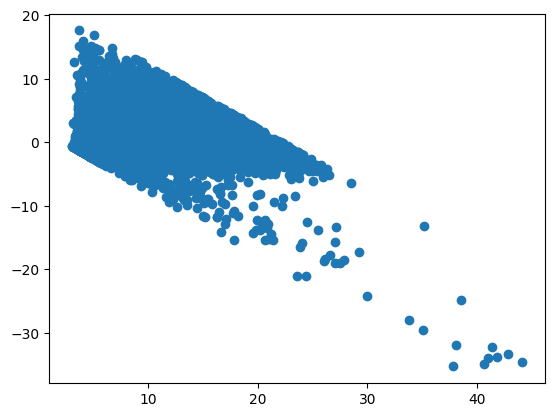

In [204]:
residual = Y_test - Y_pred_test

plt.scatter(Y_pred_test,residual)

<Axes: xlabel='fare_amount', ylabel='Count'>

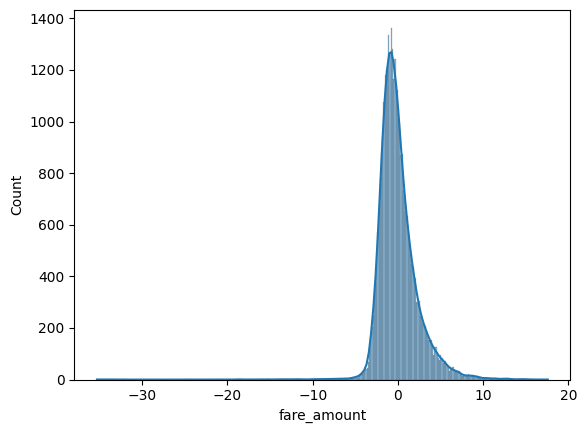

In [205]:
sns.histplot(residual,kde = True)